In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import '../trfp'

import matplotlib
matplotlib.rc('xtick', labelsize=10)     
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', titlesize=10)
matplotlib.rc('axes', labelsize=10)
plt.rcParams["font.family"] = "serif"

sns.set_style('darkgrid')

In [5]:
def multipole(N,s,A,x,y):
    r = np.sqrt(x**2+y**2)
    theta = np.arctan2(y,x)
    if(s==0):
        By = 61.79e6 + A * (r/4.5)**N * np.cos(N*theta)
        Bx = A * (r/4.5)**N * np.sin(N*theta)
    if(s==1):
        By = 61.79e6 + A * (r/4.5)**N * np.sin(N*theta)
        Bx = -A * (r/4.5)**N * np.cos(N*theta)
    B = np.sqrt(Bx**2 + By**2) - 61.79e6
    return B
  
def multipole_2(N,s,A,x,y):
    r = np.sqrt(x**2+y**2)
    theta = np.arctan2(y,x)
    if(s==0):
        By = A * (r/4.5)**N * np.cos(N*theta)
        Bx = A * (r/4.5)**N * np.sin(N*theta)
    if(s==1):
        By = A * (r/4.5)**N * np.sin(N*theta)
        Bx = -A * (r/4.5)**N * np.cos(N*theta)
    B = np.sqrt(Bx**2 + By**2)
    return Bx, By

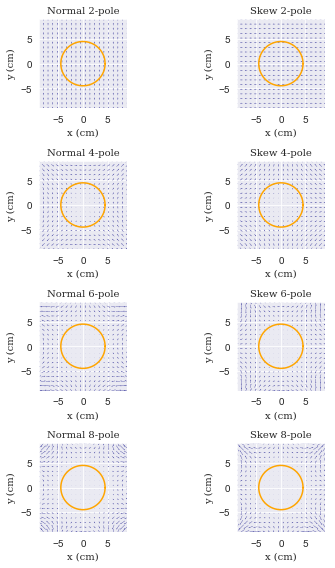

In [6]:
Ns = [0, 0, 1, 1, 2, 2, 3, 3]
ss = [0, 1, 0, 1, 0, 1, 0, 1]

X, Y = np.meshgrid(np.linspace(-9.0,9.0,20), np.linspace(-9.0,9.0,20))

theta = np.linspace(0,2*np.pi, 100)

fig, axs = plt.subplots(4,2)
for i in range(4):
    for j in range(2):

        axs[i,j].plot(4.5*np.cos(theta), 4.5*np.sin(theta), color='orange')

        k = 2*i + j
        Bx, By = multipole_2(Ns[k], ss[k], 10, X, Y)
        axs[i,j].quiver(X, Y, Bx, By, color='navy', pivot='mid')
        axs[i,j].set_aspect('equal', 'box')
        axs[i,j].set_xlim(-9,9)
        axs[i,j].set_ylim(-9,9)

        if ss[k] == 0:
            skew = 'Normal'
        else:
            skew = 'Skew'

        axs[i,j].set_title(skew + ' ' + str(int(2*Ns[k]+2)) + '-pole', fontdict={'family':'serif'})
        axs[i,j].set_xlabel('x (cm)', fontdict={'family':'serif'})
        axs[i,j].set_ylabel('y (cm)', fontdict={'family':'serif'})
    
fig.set_size_inches(6,8)
fig.tight_layout()

# fig.savefig('mult_quiver.png', dpi=300)

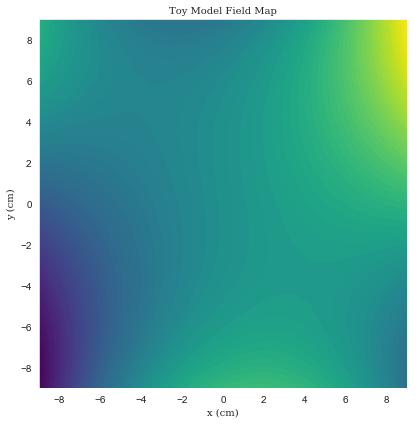

In [7]:
X, Y = np.meshgrid(np.linspace(-9.0,9.0,20), np.linspace(-9.0,9.0,20))

theta = np.linspace(0,2*np.pi, 100)

fig, axs = plt.subplots(1,1)
B = multipole(0, 0, 800, X, Y) + multipole(1, 0, 10, X, Y) +multipole(1, 1, 1, X, Y) + multipole(2, 0, -1, X, Y) + multipole(3, 1, 2, X, Y)
plot = axs.contourf(X, Y, B, 100, cmap='viridis')
axs.set_aspect('equal', 'box')
axs.set_xlim(-9,9)
axs.set_ylim(-9,9)

axs.set_title('Toy Model Field Map', fontdict={'family':'serif'})
axs.set_xlabel('x (cm)', fontdict={'family':'serif'})
axs.set_ylabel('y (cm)', fontdict={'family':'serif'})

fig.set_size_inches(6,6)
fig.tight_layout()


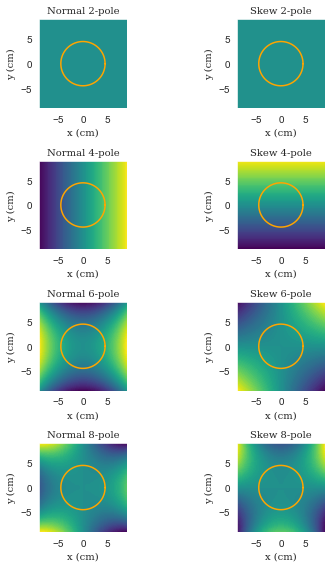

In [8]:
X, Y = np.meshgrid(np.linspace(-9.0,9.0,20), np.linspace(-9.0,9.0,20))

theta = np.linspace(0,2*np.pi, 100)

fig, axs = plt.subplots(4,2)
for i in range(4):
    for j in range(2):

        axs[i,j].plot(4.5*np.cos(theta), 4.5*np.sin(theta), color='orange')

        k = 2*i + j
        B = multipole(Ns[k], ss[k], 10, X, Y)
        plot = axs[i,j].contourf(X, Y, B, 100, cmap='viridis')
        axs[i,j].set_aspect('equal', 'box')
        axs[i,j].set_xlim(-9,9)
        axs[i,j].set_ylim(-9,9)

        if ss[k] == 0:
            skew = 'Normal'
        else:
            skew = 'Skew'

        axs[i,j].set_title(skew + ' ' + str(int(2*Ns[k]+2)) + '-pole', fontdict={'family':'serif'})
        axs[i,j].set_xlabel('x (cm)', fontdict={'family':'serif'})
        axs[i,j].set_ylabel('y (cm)', fontdict={'family':'serif'})
    
fig.set_size_inches(6,8)
fig.tight_layout()

# fig.savefig('mult_heat.png', dpi=300)

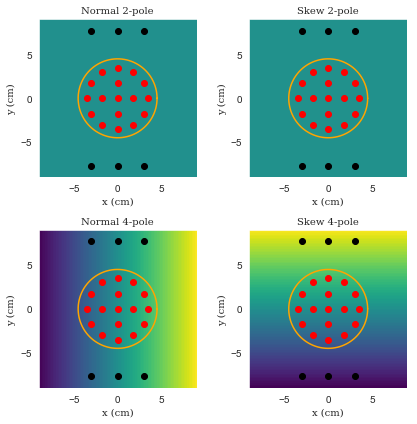

In [9]:
X, Y = np.meshgrid(np.linspace(-9.0,9.0,20), np.linspace(-9.0,9.0,20))

theta = np.linspace(0,2*np.pi, 100)

FP6_X = np.array([-3, 0, 3, -3, 0, 3])
FP6_Y = np.array([7.7, 7.7, 7.7, -7.7, -7.7, -7.7])

TR_X = np.array([0]
                + [1.75 * np.sin(2*np.pi/4*i)
                   for i in np.arange(4)]
                + [3.5 * np.sin(2*np.pi/12*i)
                   for i in np.arange(12)])
TR_Y = np.array([0]
                + [-1.75 * np.cos(2*np.pi/4*i)
                   for i in np.arange(4)]
                + [-3.5 * np.cos(2*np.pi/12*i)
                   for i in np.arange(12)])


fig, axs = plt.subplots(2,2)
for i in range(2):
    for j in range(2):

        axs[i,j].plot(4.5*np.cos(theta), 4.5*np.sin(theta), color='orange')

        k = 2*i + j
        B = multipole(Ns[k], ss[k], 10, X, Y)
        plot = axs[i,j].contourf(X, Y, B, 100, cmap='viridis')
        axs[i,j].set_aspect('equal', 'box')
        axs[i,j].set_xlim(-9,9)
        axs[i,j].set_ylim(-9,9)
        
        axs[i,j].plot(FP6_X, FP6_Y, '.', color = 'black', markersize=12)
        axs[i,j].plot(TR_X, TR_Y, '.', color = 'red', markersize=12)

        if ss[k] == 0:
            skew = 'Normal'
        else:
            skew = 'Skew'

        axs[i,j].set_title(skew + ' ' + str(int(2*Ns[k]+2)) + '-pole', fontdict={'family':'serif'})
        axs[i,j].set_xlabel('x (cm)', fontdict={'family':'serif'})
        axs[i,j].set_ylabel('y (cm)', fontdict={'family':'serif'})
    
fig.set_size_inches(6,6)
fig.tight_layout()

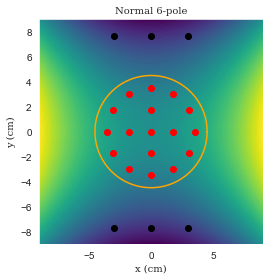

In [15]:
X, Y = np.meshgrid(np.linspace(-9.0,9.0,20), np.linspace(-9.0,9.0,20))

theta = np.linspace(0,2*np.pi, 100)

FP6_X = np.array([-3, 0, 3, -3, 0, 3])
FP6_Y = np.array([7.7, 7.7, 7.7, -7.7, -7.7, -7.7])

TR_X = np.array([0]
                + [1.75 * np.sin(2*np.pi/4*i)
                   for i in np.arange(4)]
                + [3.5 * np.sin(2*np.pi/12*i)
                   for i in np.arange(12)])
TR_Y = np.array([0]
                + [-1.75 * np.cos(2*np.pi/4*i)
                   for i in np.arange(4)]
                + [-3.5 * np.cos(2*np.pi/12*i)
                   for i in np.arange(12)])


fig, ax = plt.subplots(1)

k=4

ax.plot(4.5*np.cos(theta), 4.5*np.sin(theta), color='orange')

B = multipole(Ns[k], ss[k], 10, X, Y)
plot = ax.contourf(X, Y, B, 100, cmap='viridis')
ax.set_aspect('equal', 'box')
ax.set_xlim(-9,9)
ax.set_ylim(-9,9)

ax.plot(FP6_X, FP6_Y, '.', color = 'black', markersize=12)
ax.plot(TR_X, TR_Y, '.', color = 'red', markersize=12)

if ss[k] == 0:
    skew = 'Normal'
else:
    skew = 'Skew'

ax.set_title(skew + ' ' + str(int(2*Ns[k]+2)) + '-pole', fontdict={'family':'serif'})
ax.set_xlabel('x (cm)', fontdict={'family':'serif'})
ax.set_ylabel('y (cm)', fontdict={'family':'serif'})
    
fig.set_size_inches(4,4)
fig.tight_layout()

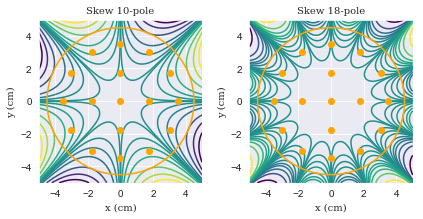

In [10]:
tr_x = np.array([0] + [1.75 * np.sin(2*np.pi/4*i) for i in np.arange(4)] + [3.5 * np.sin(2*np.pi/12*i) for i in np.arange(12)])
tr_y = np.array([0] + [-1.75 * np.cos(2*np.pi/4*i) for i in np.arange(4)] + [-3.5 * np.cos(2*np.pi/12*i) for i in np.arange(12)])

X, Y = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))

B = multipole(4, 1, 1, X, Y)

fig, ax = plt.subplots(1,2)

ax[0].contour(X,Y,B, cmap='viridis', levels=[-3, -2, -1.5, -1, -0.5, -0.25, -0.1, -0.01, 0.01, 0.1, 0.25, 0.5, 1, 1.5, 2, 3])

ax[0].plot(tr_x, tr_y, '.', color='orange', markersize=12)
ax[0].plot(4.5*np.cos(theta), 4.5*np.sin(theta), color='orange')

ax[0].set_aspect('equal', 'box')
ax[0].set_xlim(-5,5)
ax[0].set_ylim(-5,5)

ax[0].set_title('Skew 10-pole', fontdict={'family':'serif'})

ax[0].set_xlabel('x (cm)', fontdict={'family':'serif'})
ax[0].set_ylabel('y (cm)', fontdict={'family':'serif'})

B = multipole(8, 1, -1, X, Y)

ax[1].contour(X,Y,B, cmap='viridis', levels=[-10, -5, -3, -2, -1.5, -1, -0.5, -0.25, -0.1, -0.01, 0.01, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5, 10])

ax[1].plot(tr_x, tr_y, '.', color='orange', markersize=12)
ax[1].plot(4.5*np.cos(theta), 4.5*np.sin(theta), color='orange')

ax[1].set_aspect('equal', 'box')
ax[1].set_xlim(-5,5)
ax[1].set_ylim(-5,5)

ax[1].set_title('Skew 18-pole', fontdict={'family':'serif'})

ax[1].set_xlabel('x (cm)', fontdict={'family':'serif'})
ax[1].set_ylabel('y (cm)', fontdict={'family':'serif'})

fig.set_size_inches(6,3)
fig.tight_layout()

# fig.savefig('alias_10_18.png', dpi=300)

In [ ]:
tr_x = np.array([0] + [1.75 * np.sin(2*np.pi/4*i) for i in np.arange(4)] + [3.5 * np.sin(2*np.pi/12*i) for i in np.arange(12)])
tr_y = np.array([0] + [-1.75 * np.cos(2*np.pi/4*i) for i in np.arange(4)] + [-3.5 * np.cos(2*np.pi/12*i) for i in np.arange(12)])

X, Y = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))

B = multipole(6, 1, 1, X, Y)

fig, ax = plt.subplots(1,1)

ax.contour(X,Y,B, cmap='viridis', levels=[-5, -3, -2, -1.5, -1, -0.5, -0.25, -0.1, -0.01, 0.01, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5])

ax.plot(tr_x, tr_y, '.', color='orange', markersize=12)
ax.plot(4.5*np.cos(theta), 4.5*np.sin(theta), color='orange')

ax.set_aspect('equal', 'box')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

ax.set_title('Skew 14-pole', fontdict={'family':'serif'})

ax.set_xlabel('x (cm)', fontdict={'family':'serif'})
ax.set_ylabel('y (cm)', fontdict={'family':'serif'})

fig.set_size_inches(3,3)
fig.tight_layout()

# fig.savefig('alias_14.png', dpi=300)

In [ ]:
print trfp.matrices.THETA_FP_4

In [ ]:
matrix = trfp.matrices.THETA_FP_6

for row in matrix:
    row_str = [str(item) for item in np.round(row,4)]
    for i in range(len(row_str)):
        if row_str[i] == '0.0':
            row_str[i] = '0'
    print " & ".join(row_str) + r"\\"
